#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*Rodrigo Rodriguez Rodriguez A01183284
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [47]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pydotplus
from IPython.display import Image
import graphviz  # doctest: +NO_EXE

#**Ejercicio-1.**

In [48]:
df=pd.read_csv("SouthGermanCredit.asc",sep=" ")
df.rename(columns={"laufkont":"status", "laufzeit":"duration", "moral":"credit_history", "verw":"purpose", "hoehe":"amount",
                "sparkont":"savings", "beszeit":"employment_duration", "rate":"installment_rate",
                "famges":"personal_status_sex", "buerge":"other_debtors",
                "wohnzeit":"present_residence", "verm":"property",
                "alter":"age", "weitkred":"other_installment_plans",
                "wohn":"housing", "bishkred":"number_credits",
                "beruf":"job", "pers":"people_liable", "telef":"telephone", "gastarb":"foreign_worker",
                "kredit":"credit_risk"}, inplace=True)
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#**Ejercicio-2.**

In [75]:
X = df.iloc[:,:20]
Y = df.credit_risk
print(X.shape)
print(Y.shape)

(1000, 20)
(1000,)


In [76]:
#verificar cual es correcta si stratify o no
#X_train, X_val, y_train, y_val = train_test_split(X, Y, train_size=0.85, random_state=1,stratify=Y)

X_train, X_val, y_train, y_val = train_test_split(X, Y, train_size=0.85, random_state=1)

print(X_train.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(X_val.shape, ': dimensión de datos de entrada para prueba')

print(y_train.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(y_val.shape, ': dimensión de variable de salida para prueba')

(850, 20) : dimensión de datos de entrada para entrenamiento y validación
(150, 20) : dimensión de datos de entrada para prueba
(850,) : dimensión de variable de salida para entrenamiento y validación
(150,) : dimensión de variable de salida para prueba


#**Ejercicio-3.**
Definen cuatro tipo de variables: categórica (categorical), ordinal
(discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha
información realiza un Pipeline que incluya al menos las siguientes transformaciones:
a. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable
(decide y justifica que tipo de imputación realizas en cada caso).
b. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una
transformación que escale a todas ellas en un rango equiparable.
c. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y
binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la
transformación one-hot encoding. Por el momento dejar las variables ordinales sin
transformar.


In [77]:
# Transformaciones a factores numéricos de entrada:Quantitativas
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])
num_pipeline_nombres = ['amount','duration','age'] ###definir variables numericas


catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first',handle_unknown='ignore'))])
catOHE_pipeline_nombres = [  'status', 'credit_history', 'purpose', 'savings', 'personal_status_sex','other_debtors','other_installment_plans', 'housing', 'telephone', 'foreign_worker', 'people_liable']#definir variables binarias
#catOHE_pipeline_nombres = [ 'telephone', 'foreign_worker','people_liable']#definir variables binarias


###Póner proque decidimos cual de esta es

## Properties Ordinal

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
cT= ColumnTransformer(transformers = [
    ('numpipe', num_pipeline, num_pipeline_nombres),('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],remainder='passthrough')


# Transformaciones a factores categóricos de entrada:
#catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
#catImp_pipeline_nombres = ['housing', 'other_installment_plans', 'other_debtors', 'personal_status_sex', 'savings', 'purpose', 'duration', 'credit_history']#definir variables categoricas
#transformaciones binarias
#bi_pipeline=Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
#bi_pipeline_nombres=['telephone','foreign_worker','people_liable']

#variables duration, amount and age are truly quantitative
## variables installment_rate, present_residence and number_credits are
    ### quantitative in the data, but are in fact discretized scores for
    ### an underlying quantitative variable
    ### and are thus stored as ordered factors below
## variable people_liable is quantitative in the data but is in fact
    ### a binarized score (less 0 to 2 versus 3 or more)
    ### and is thus stored as a factor below
## all the numeric values (=level codes)
    ### for the categorical variables
    ### (including the discretized quantitative variables),
    ### are the P2 scores from Häußler (1979)
    ### which can be directly used in credit scoring (larger=better).
    ### (Exceptions have been corrected in the raw data,
    ###     which implies that columns pers and gastarb have
    ###     entries opposite to those in Open Data LMU (2010)
    ###     and the GermanCredit data from the UCI ML Repo.)

#**Ejercicio-4.**

. Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de
aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás
llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda
aplicar las transformaciones que definiste en tu Pipeline

In [78]:
def get_model():
    modelado, nombres = list(), list()

  # LR - Regresión Logística:
    modelado.append(LogisticRegression(max_iter=3000))
    nombres.append('LR')

  # DT - Árbol de Decisión:
    modelado.append(DecisionTreeClassifier())
    nombres.append('DT')
  #Bosque Aleatorio
    modelado.append(RandomForestClassifier())
    nombres.append('BA')

    return modelado, nombres

modelos, nombres = get_model()
print(modelos)
print(nombres)


[LogisticRegression(max_iter=3000), DecisionTreeClassifier(), RandomForestClassifier()]
['LR', 'DT', 'BA']


In [79]:
def mi_recall(yreal, ypred):
    mi_cm=confusion_matrix(yreal,ypred)
    tot = mi_cm.sum()
    fn = 100*mi_cm[1,0] / tot
    vp = 100*mi_cm[1,1] / tot
    recall = vp / (vp+fn)
    return recall

In [80]:
def mi_fscore(yreal, ypred):

# INVOCAMOS A CONFUSION MATRIX
     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot
     fscore = (2 * vp) / ((2*vp) + fp + vn)

     return fscore

In [81]:
def mi_precision(yreal, ypred):

# INVOCAMOS A CONFUSION MATRIX
     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot

     precision = vp / (vp + fp)

     return precision

In [82]:
def mi_accuracy(yreal, ypred):

# INVOCAMOS A CONFUSION MATRIX
     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot

     accuracy = (vp + vn) / (vp + fn + vn + fp)

     return accuracy

In [83]:
def mi_gmean(yreal,ypred):
    cm = confusion_matrix(yreal, ypred)
    tot=cm.sum()
    vn = 100*cm[0,0]/tot
    fp = 100*cm[0,1]/tot
    fn = 100*cm[1,0]/tot
    vp = 100*cm[1,1]/tot
    recall = vp / (vp+fn)
    especificidad = vn / (vn+fp)
    gmean = np.sqrt(recall * especificidad)
    return gmean


In [84]:
modelos, nombres = get_model()
resultados=list()
for i in range(len(modelos)):
    pipeline = Pipeline(steps=[('CT',cT),('M',modelos[i])])
    Kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)


    Scores = {'accuracy':make_scorer(mi_accuracy), 'recall':make_scorer(mi_recall), 'gmean':make_scorer(mi_gmean),'f1':make_scorer(mi_fscore),'precision':make_scorer(mi_precision) }#Falta hacer nuestro propios metodos

    scoresSin = cross_validate(pipeline,
                          X_train, np.ravel(y_train),
                          scoring=Scores,
                          cv=Kfold,
                          return_train_score=True)
    resultados.append(scoresSin)

    print("Para los datos de test")
    print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nGmean: %.3f (%.4f)\nPrecision: %.3f (%.4f)\nF1: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scoresSin['test_accuracy']),
                                                                          np.std(scoresSin['test_accuracy']),
                                                                          np.mean(scoresSin['test_recall']),
                                                                          np.std(scoresSin['test_recall']),
                                                                          np.mean(scoresSin['test_gmean']),
                                                                          np.std(scoresSin['test_gmean']),
                                                                          np.mean(scoresSin['test_precision']),
                                                                          np.std(scoresSin['test_precision']),
                                                                          np.mean(scoresSin['test_f1']),
                                                                          np.std(scoresSin['test_f1'])
                                                                          ))
    print("Para los datos de train")
    print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean Gmean: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Fscore: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scoresSin['train_accuracy']),
                                                                          np.std(scoresSin['train_accuracy']),
                                                                          np.mean(scoresSin['train_recall']),
                                                                          np.std(scoresSin['train_recall']),
                                                                          np.mean(scoresSin['train_gmean']),
                                                                          np.std(scoresSin['train_gmean']),
                                                                          np.mean(scoresSin['train_precision']),
                                                                          np.std(scoresSin['train_precision']),
                                                                          np.mean(scoresSin['train_f1']),
                                                                          np.std(scoresSin['train_f1'])
                                                                          ),"\n\n")



Para los datos de test
LR:
mean Accuracy: 0.761 (0.0230)
mean Recall: 0.880 (0.0309)
Gmean: 0.654 (0.0379)
Precision: 0.798 (0.0179)
F1: 0.801 (0.0057)

Para los datos de train
LR:
mean Accuracy: 0.795 (0.0102)
mean Recall: 0.902 (0.0055)
mean Gmean: 0.704 (0.0178)
mean Precision: 0.821 (0.0090)
mean Fscore: 0.805 (0.0012)
 


Para los datos de test
DT:
mean Accuracy: 0.679 (0.0385)
mean Recall: 0.762 (0.0392)
Gmean: 0.609 (0.0466)
Precision: 0.774 (0.0267)
F1: 0.777 (0.0100)

Para los datos de train
DT:
mean Accuracy: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean Gmean: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Fscore: 0.821 (0.0005)
 


Para los datos de test
BA:
mean Accuracy: 0.759 (0.0172)
mean Recall: 0.907 (0.0213)
Gmean: 0.617 (0.0335)
Precision: 0.783 (0.0137)
F1: 0.806 (0.0047)

Para los datos de train
BA:
mean Accuracy: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean Gmean: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Fscore: 0.821 (0.0005)
 




Diagramas de Bigotes

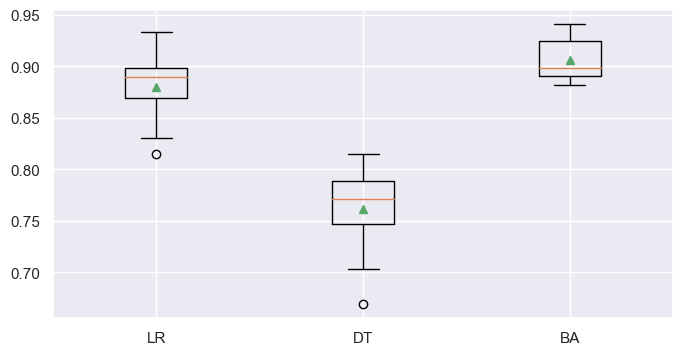

In [85]:
sns.set(rc={'figure.figsize':(8,4)})
bpGmean = list()
for i in range(len(resultados)):
  rr = resultados[i]['test_recall']
  bpGmean.append(rr)

plt.boxplot(bpGmean, labels=nombres, showmeans=True)
plt.show()

Learning Curves

In [ ]:

def mi_grafica(modelos,Xin,y,i):
       modelo = modelos

       xcolumnas = cT.fit(Xin)
       Xtransform = xcolumnas.transform(Xin)

       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)



       delta_train_sz = np.linspace(0.1, 1.0, num=20)


       if(i<2):
          tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,
                                                        X = Xtransform,
                                                        y = y,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_fscore),
                                                        random_state=0)
       if (i == 2):
          tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,
                                                        X = Xtransform,
                                                        y = y,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_recall),
                                                        random_state=0)
        if(i==4)
            tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,
                                                        X = Xtransform,
                                                        y = y,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_precision),
                                                        random_state=0)

       # Obtenemos el gráfico con las curvas de aprendizaje:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,i)

In [87]:
#Esta función grafica las curvas de aprendizaje
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores,i):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')

    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')

    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    if(i<2):
       plt.ylabel('f1 score')
    else:
       plt.ylabel('recall')

    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [88]:
modelos, nombres = get_model()
print(modelos)

[LogisticRegression(max_iter=3000), DecisionTreeClassifier(), RandomForestClassifier()]


Curva de aprendizaje para el modelo LR


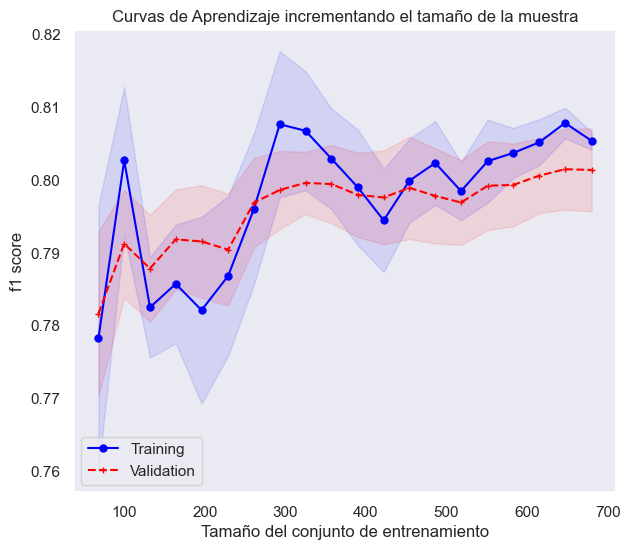

Curva de aprendizaje para el modelo DT


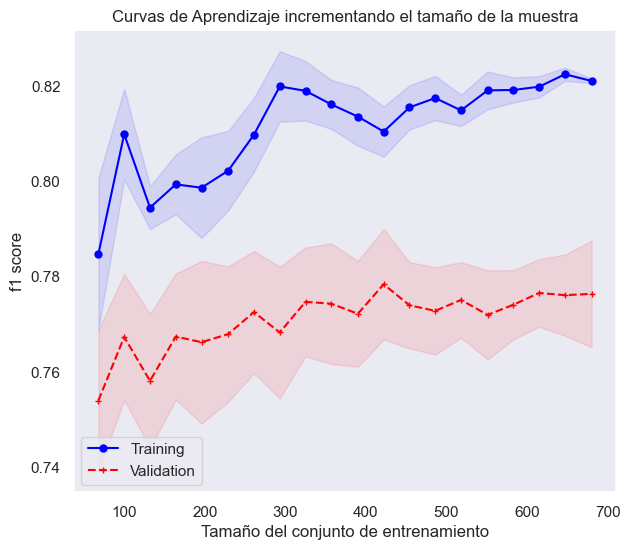

Curva de aprendizaje para el modelo BA


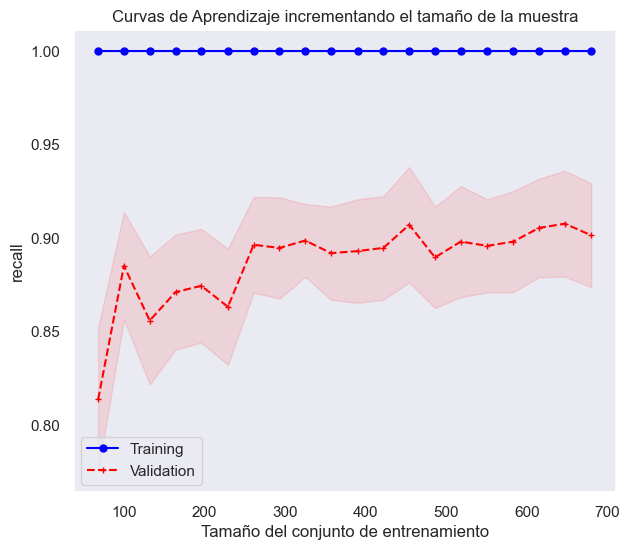

In [89]:
cv= Kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)
for i in range(len(modelos)):
    print(f"Curva de aprendizaje para el modelo {nombres[i]}")
    mi_grafica(modelos[i],X_train,y_train,i)

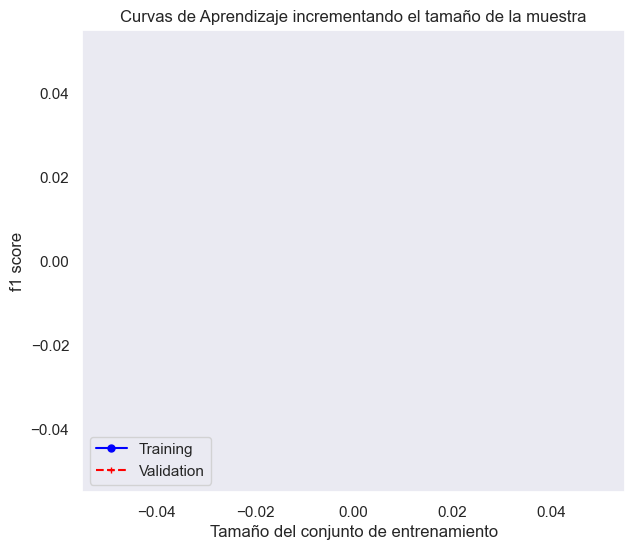

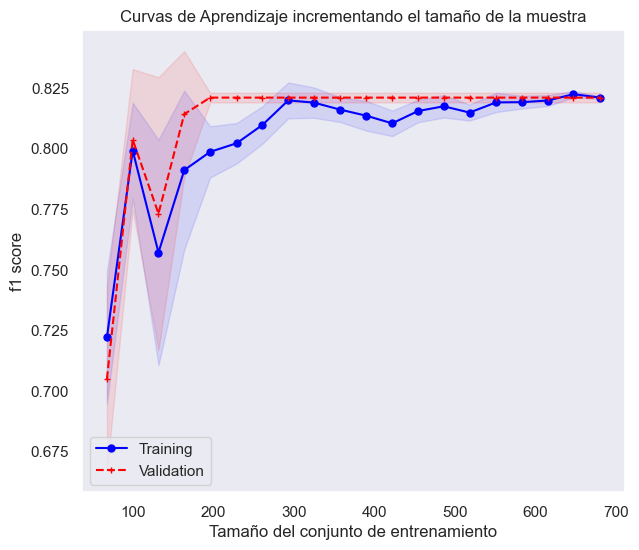

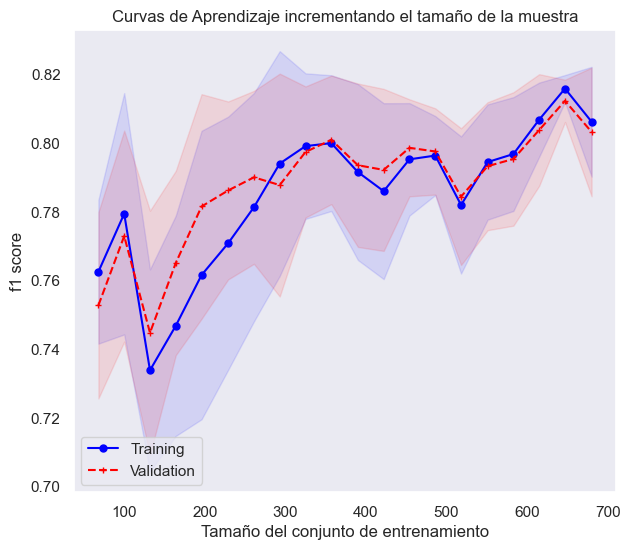

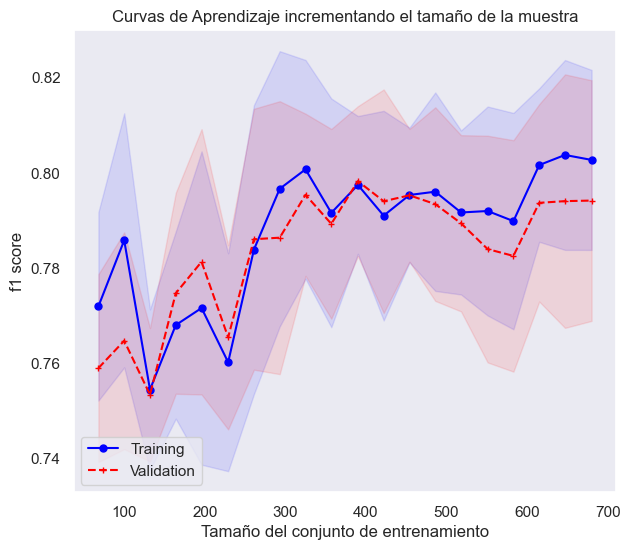

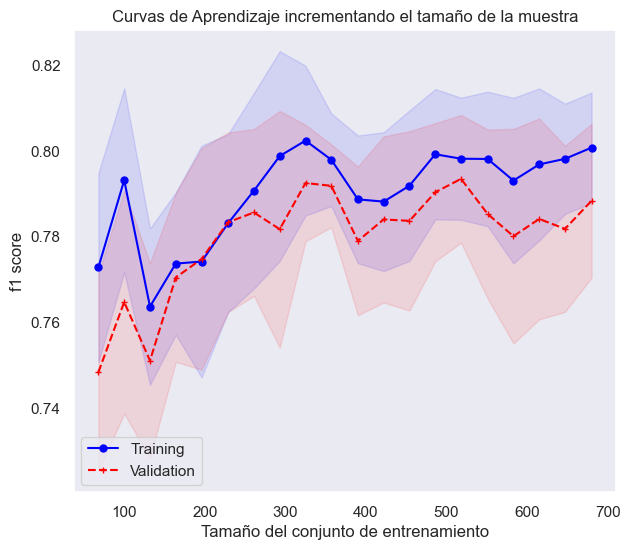

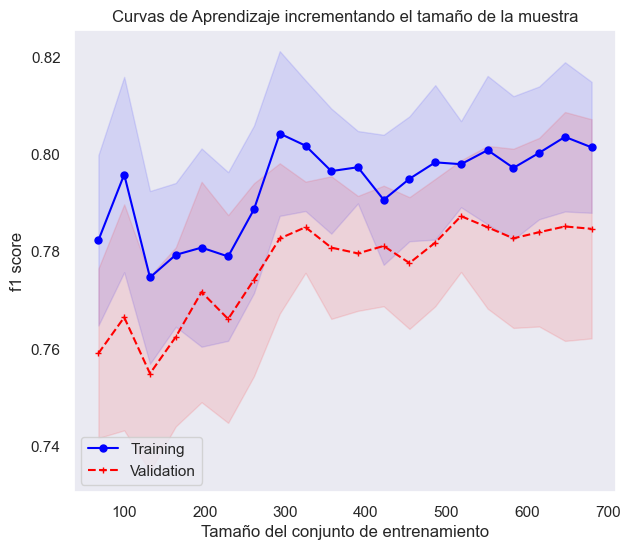

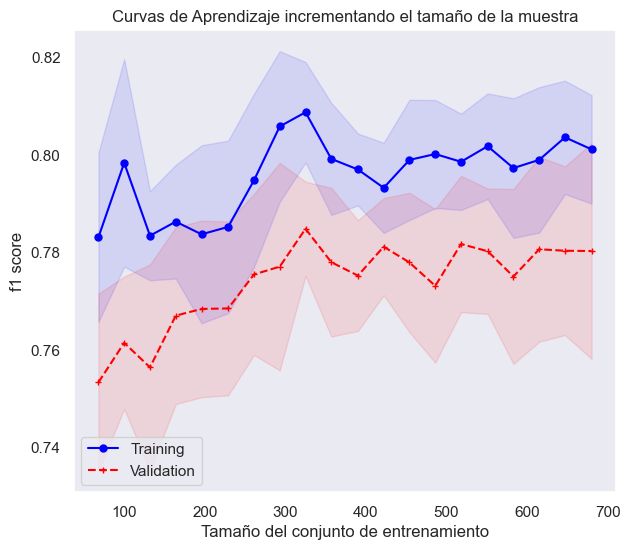

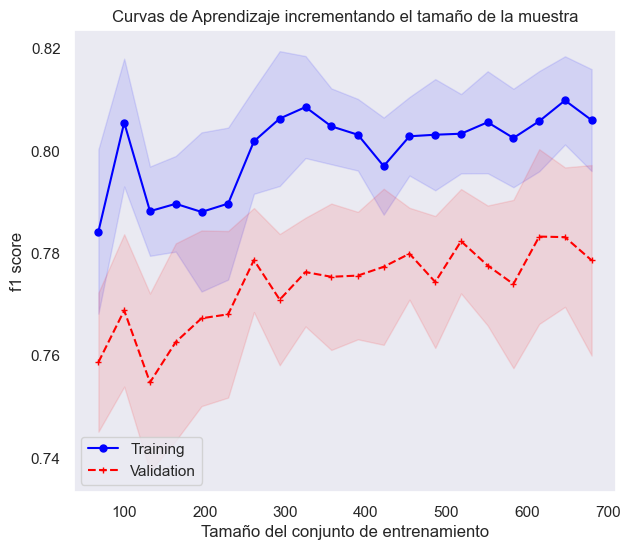

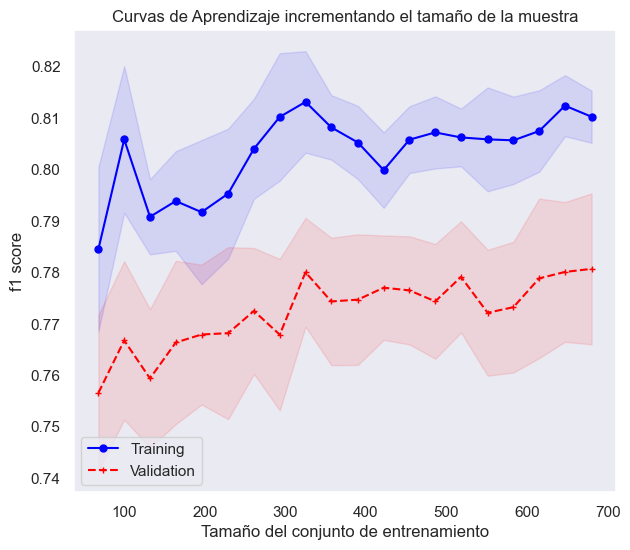

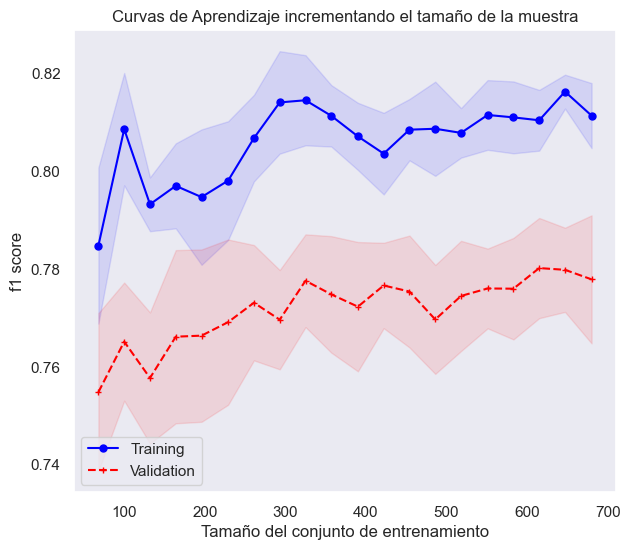

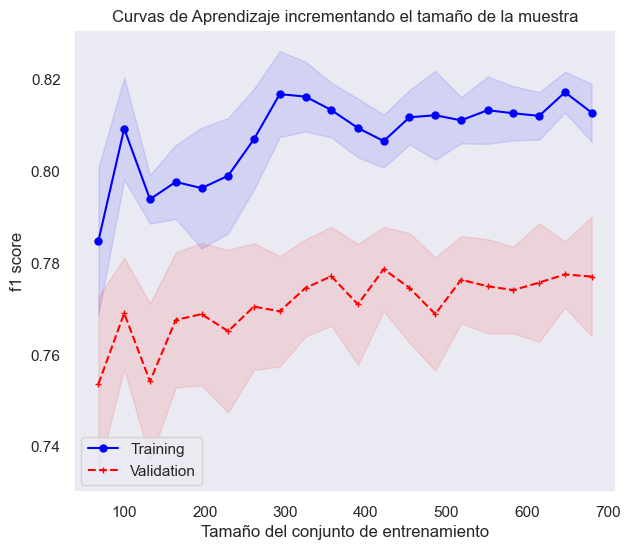

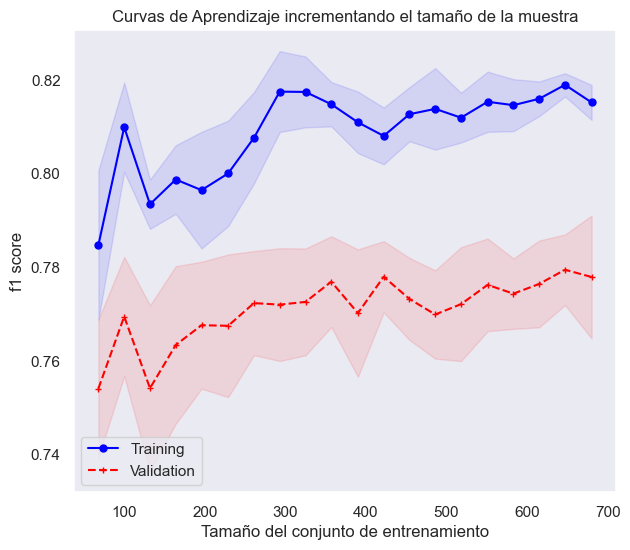

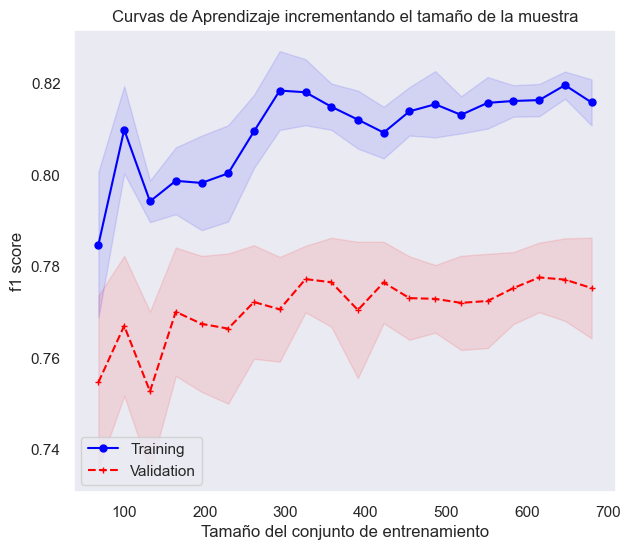

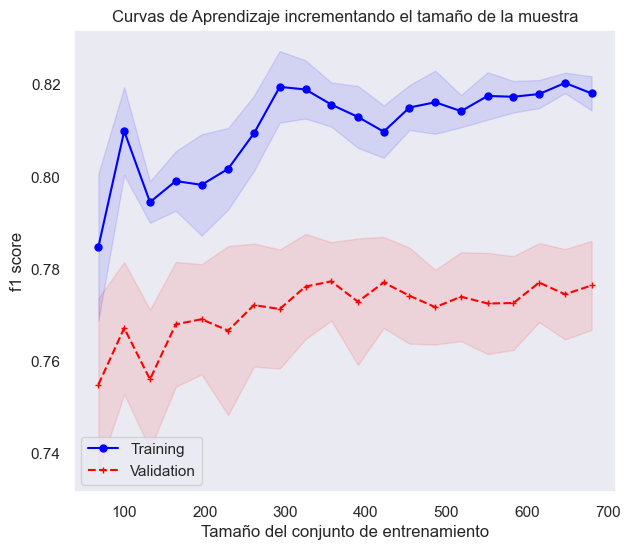

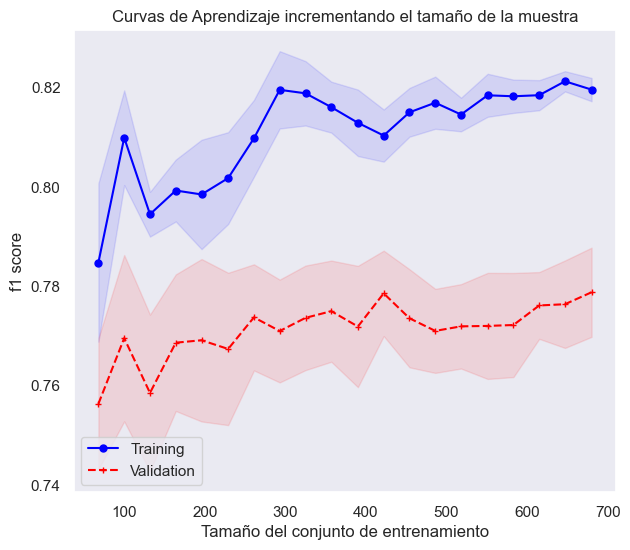

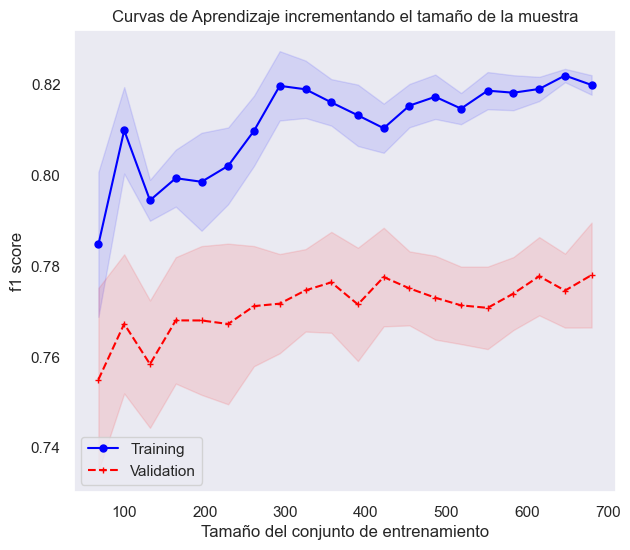

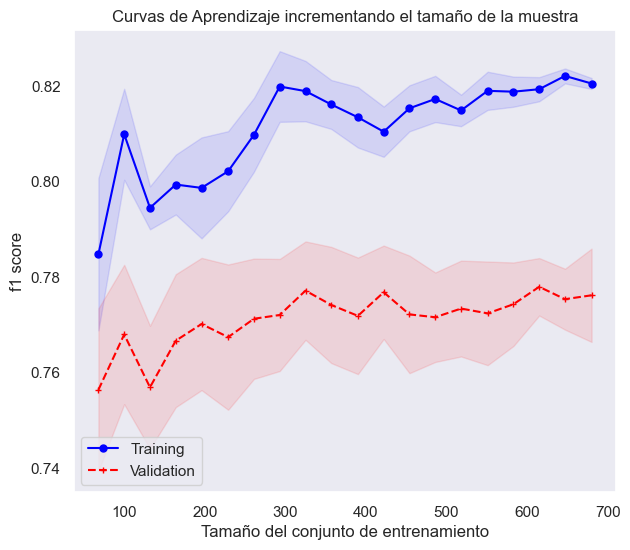

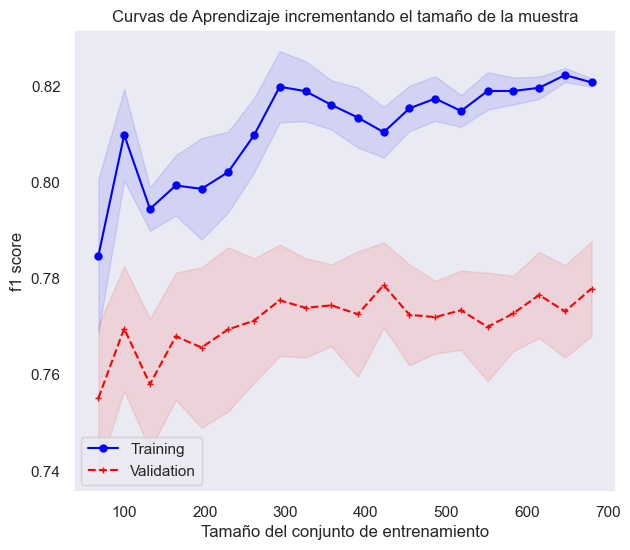

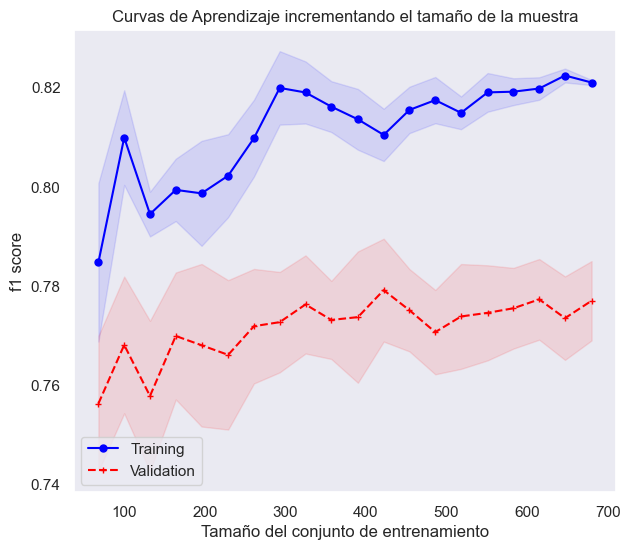

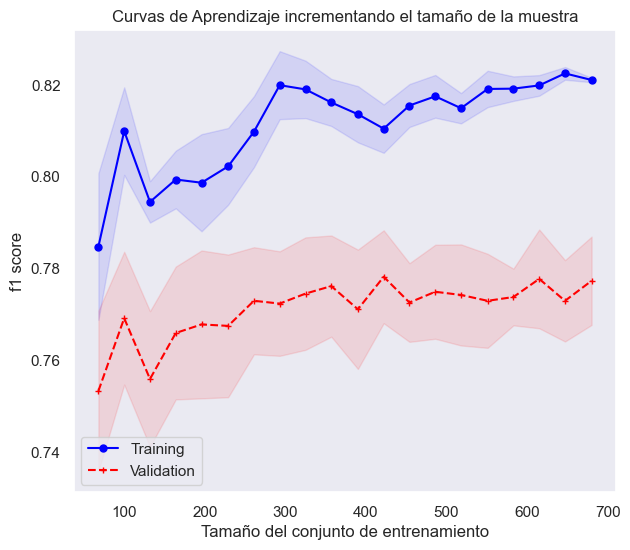

In [96]:
for i in range(20):
    mi_grafica (DecisionTreeClassifier(max_depth=i),X_train,y_train,1)

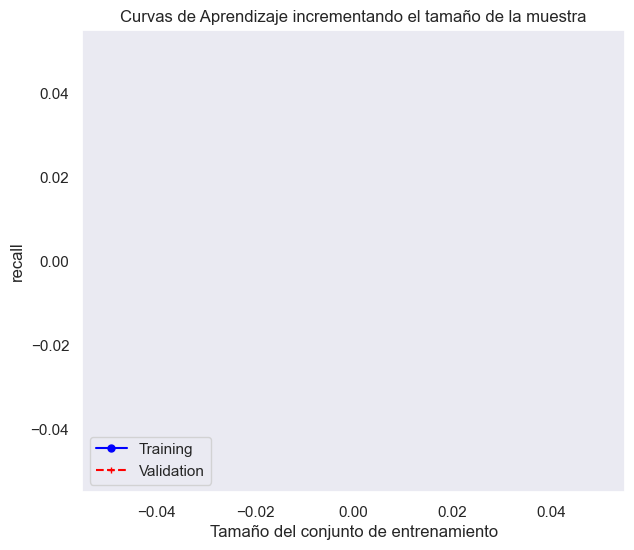

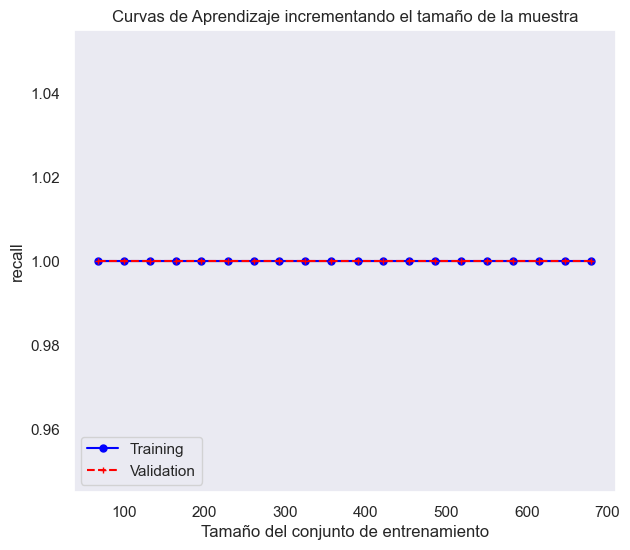

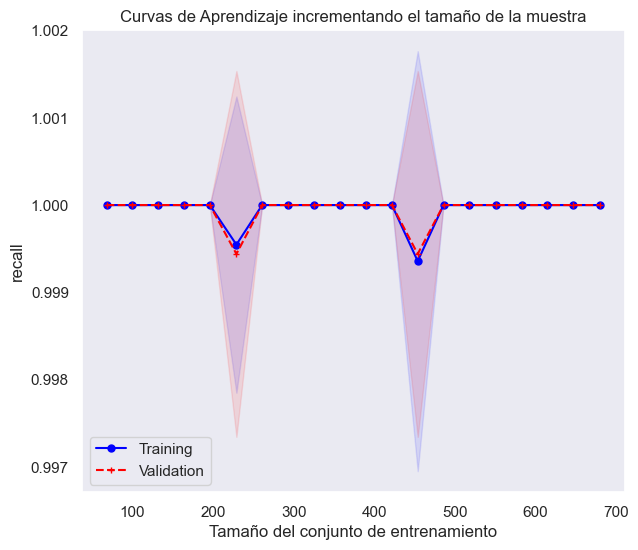

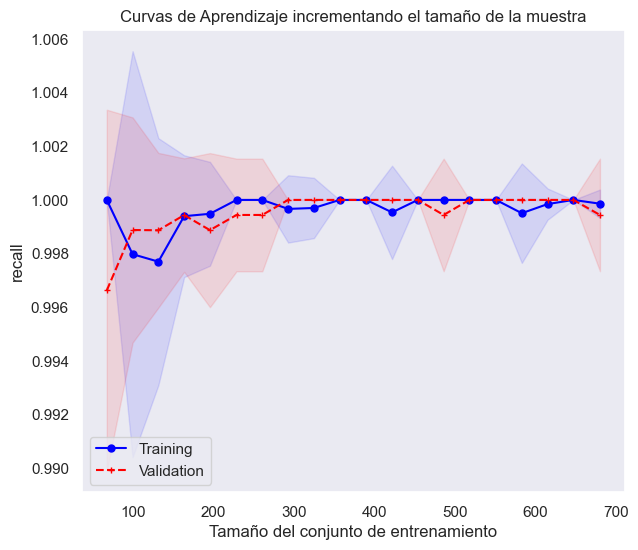

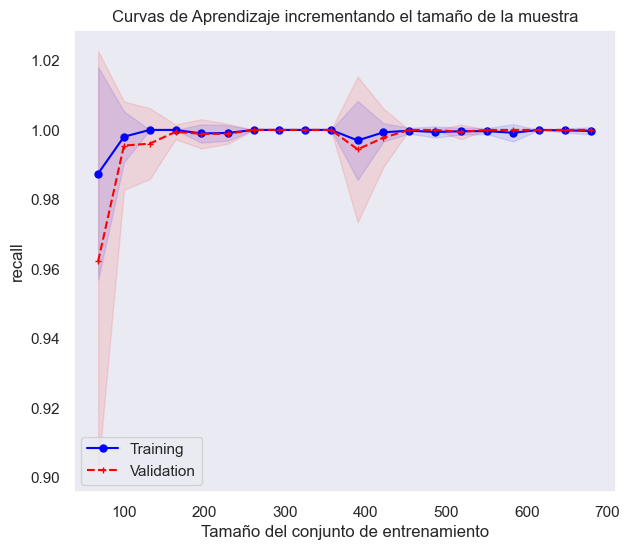

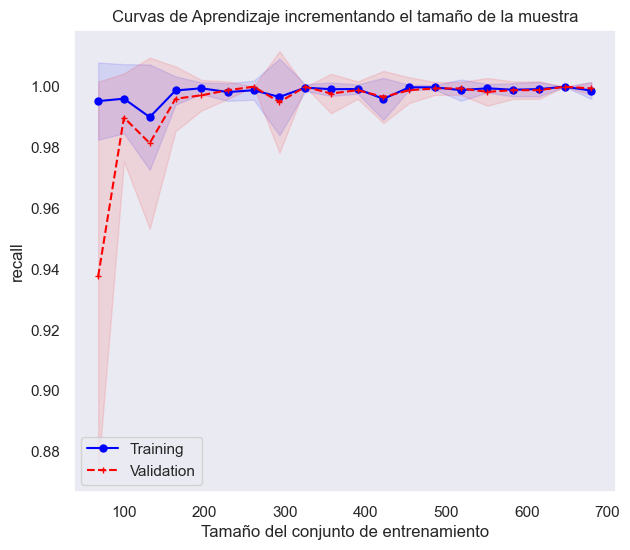

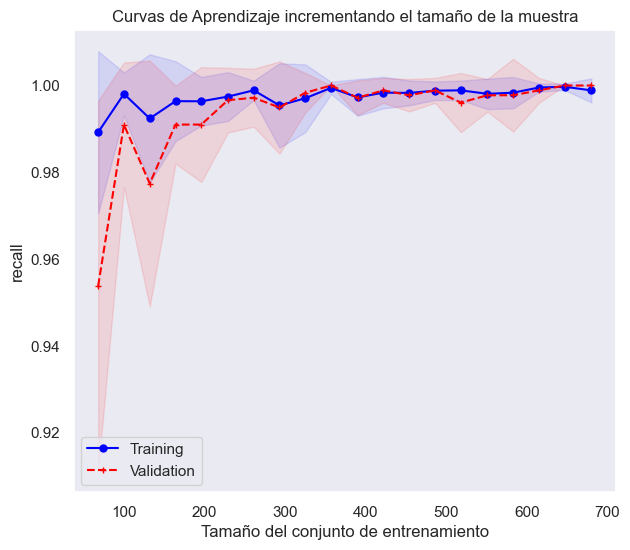

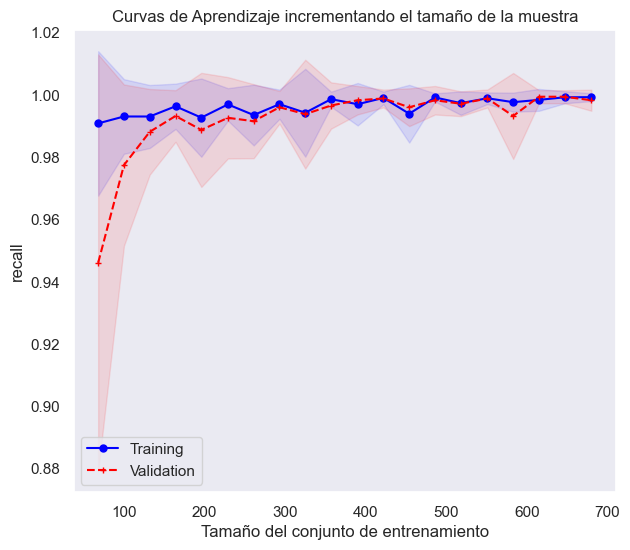

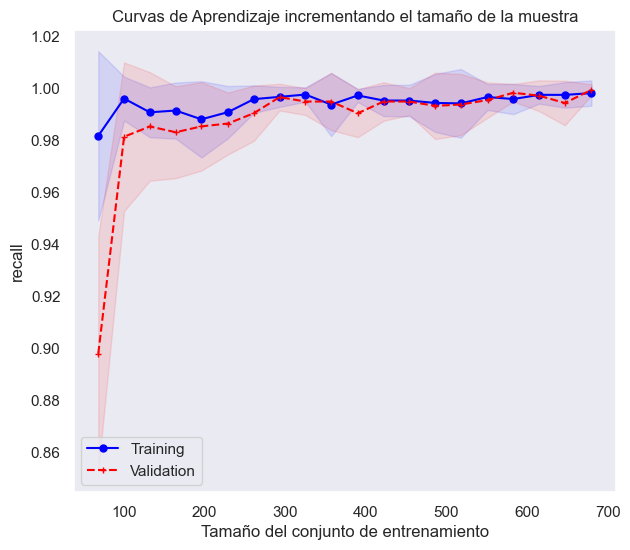

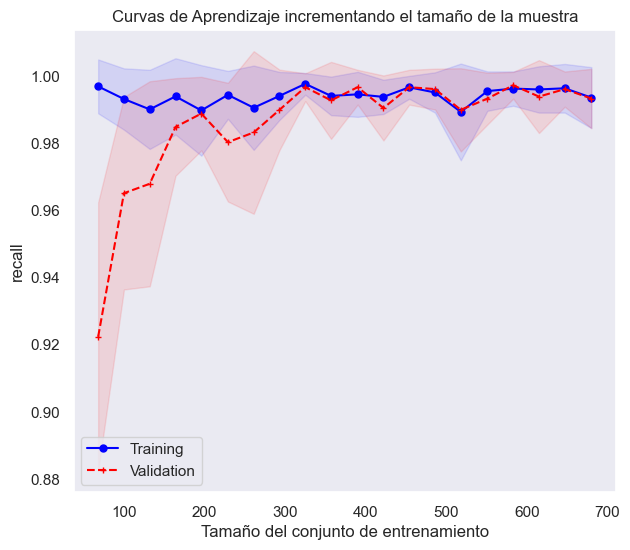

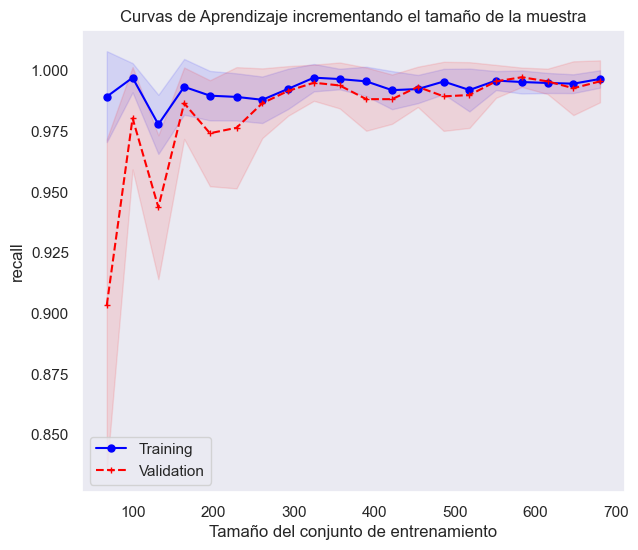

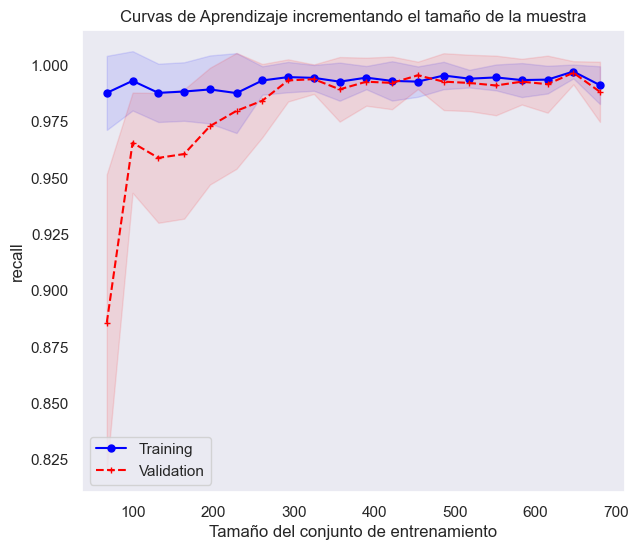

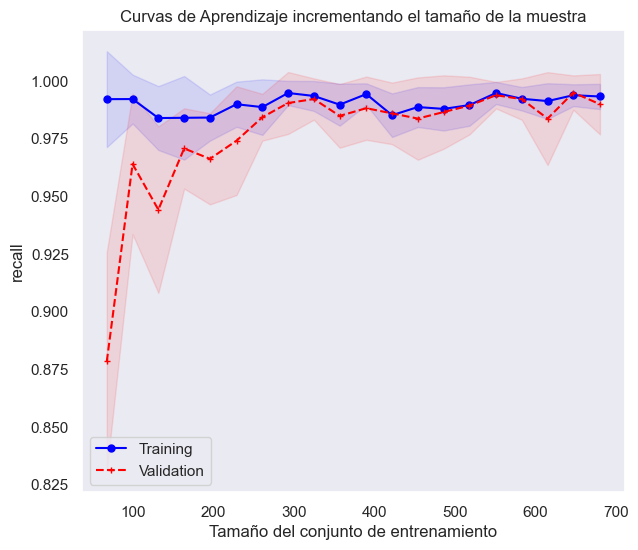

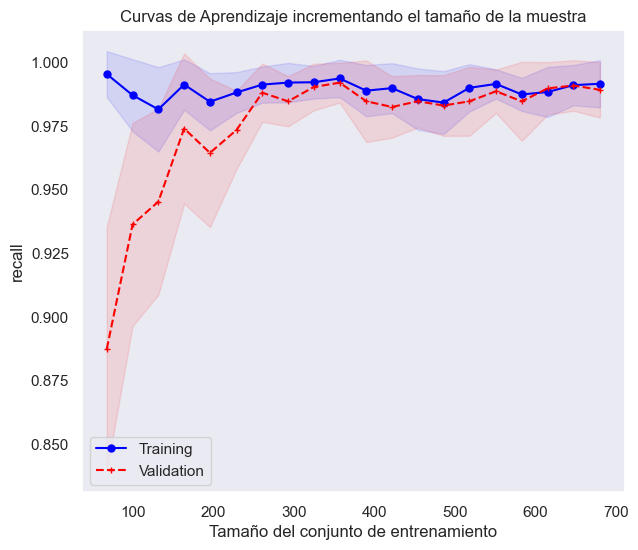

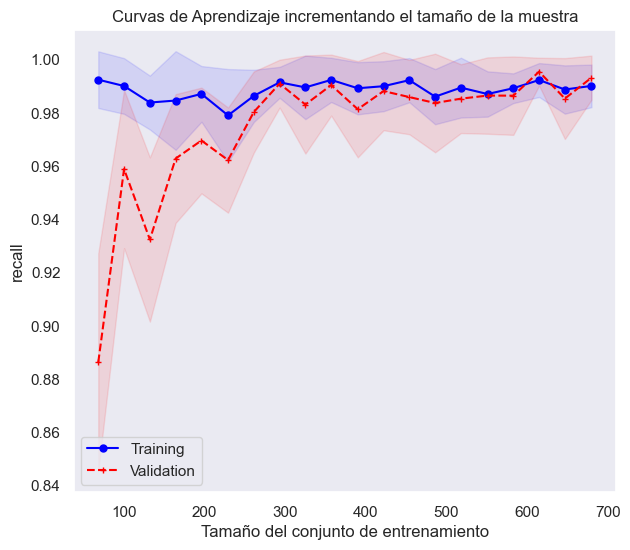

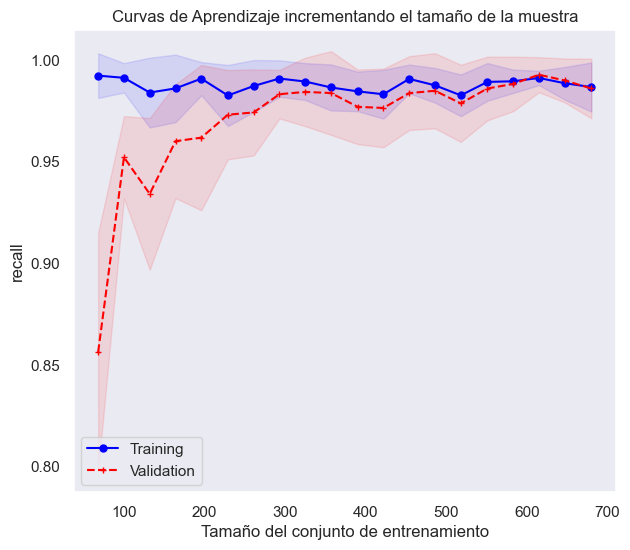

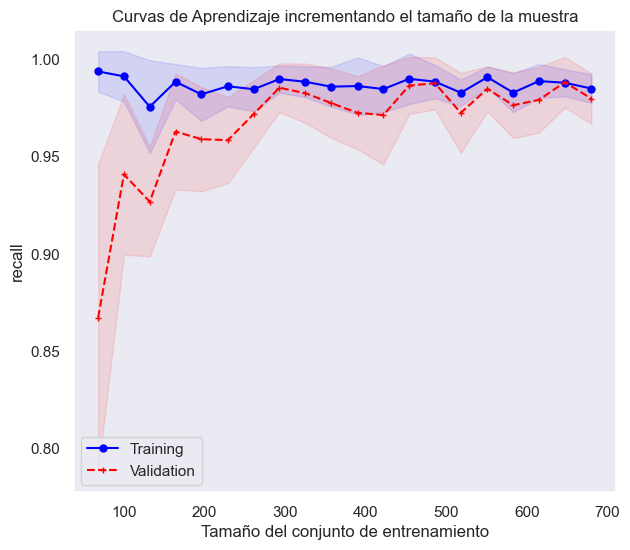

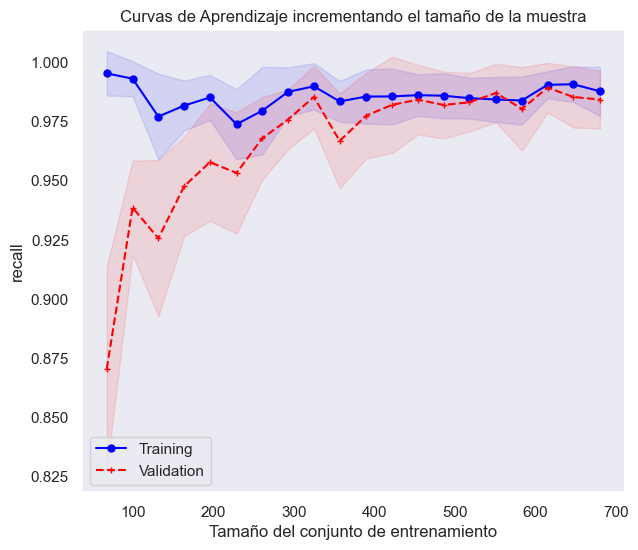

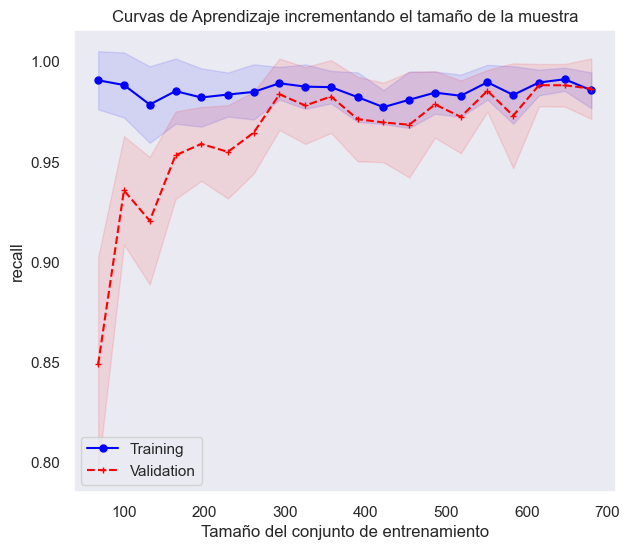

In [ ]:
for i in range(20):
    mi_grafica (RandomForestClassifier(max_samples=i),X_train,y_train,2)

-----------------#**Ejercicio-5.**
Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así
como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método
GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores
hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación
cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas
la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también
aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha
seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas.
Puedes consultar su documentación de GridSearchCV en la siguiente liga

In [91]:
def do_grid_search(model, X, y, cv, dicc_grid, scoring = 'accuracy'):

    #Nuestro pipe, otra vez
    grid_pipe = Pipeline(steps = [
        ('Correlation', cT),
        ('model', model)
        ])

    #Creamos el grid
    grid = GridSearchCV(
        estimator= grid_pipe, cv=cv,
        param_grid=dicc_grid, scoring=scoring)

    #Le entramos los valores. Recuerda que el .ravel() es para evitar un warning
    grid.fit(X, y.values.ravel())

    #Imprimimos resultados
    print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
    print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
    print('Métrica utilizada:', grid.scoring)

In [92]:
dicc_grid = {'model__C':np.linspace(70, 100, 10),
             'model__solver':['newton-cg','lbfgs','liblinear','sag','saga'],
             'model__class_weight':[None,'balanced'],
             'model__penalty':['l1','l2','elasticnet', None]
             }

do_grid_search(modelos[0], X_train, y_train, Kfold, dicc_grid, 'f1')

Mejor valor de exactitud obtenido con la mejor combinación: 0.8347601833871479
Mejor combinación de valores encontrados de los hiperparámetros: {'model__C': 73.33333333333333, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Métrica utilizada: f1


D:\Users\oviwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3900 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\oviwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\oviwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Users\oviwa\AppData\Local\Programs\Python\Python310\l

In [ ]:
mi_grafica (LogisticRegression(max_iter=5000,C=73.33,solver='liblinear',penalty='l1'),X_train,y_train,1)## verificar como aumentar la muestra 20 veces


In [93]:
dicc_grid = {'model__ccp_alpha':np.linspace(0.0001, 100, 10),
             'model__criterion':['gini', 'entropy', 'log_loss'],
             'model__max_depth':np.linspace(1, 1000, 10,dtype=int),
             'model__min_samples_split':np.linspace(0.000001, 100, 10),
             'model__class_weight':['balanced',None],
             }

do_grid_search(modelos[1], X_train, y_train, Kfold, dicc_grid, 'precision')


KeyboardInterrupt



In [ ]:
mi_grafica (DecisionTreeClassifier(ccp_alpha=0.0001,class_weight='balanced',criterion='gini',max_depth=1,min_samples_split=0.000001),X_train,y_train,4)# verificar este paso

In [ ]:
dicc_grid = {'model__ccp_alpha':np.linspace(0.00001, 1000, 10),
             'model__criterion':['gini', 'entropy', 'log_loss'],
             'model__max_depth':[np.linspace(1, 1000, 10,dtype=int),None],
             'model__min_samples_split':np.linspace(0.000001, 1000, 10),
             'model__class_weight':['balanced','balanced_subsample',None],
             }

do_grid_search(modelos[2], X_train, y_train, Kfold, dicc_grid, 'recall')

In [ ]:
mi_grafica (RandomForestClassifier(ccp_alpha=0.0001,class_weight='balanced',criterion='gini',max_depth=1,min_samples_split=0.000001),X_train,y_train,2)#verificar este paso


#**Ejercicio-6.**
Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando
el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te
indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo
de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para
entrenamiento y validación:


### se necesitan igualar los parametros de arriba despues de evaluar y ver cuales son los mejores

In [ ]:
mi_grafica (LogisticRegression(max_iter=5000,C=70,solver='liblinear',penalty='l2'),X_val,y_val,1)

In [ ]:
mi_grafica(DecisionTreeClassifier(ccp_alpha=0.0001,class_weight='balanced',criterion='gini',max_depth=1,min_samples_split=0.000001),X_val,y_val,1)

In [ ]:
modelo = DecisionTreeClassifier()
clf = modelo.fit(X_val, y_val)

Fatla hacer funcionar el Arbol

In [ ]:
dot_data = tree.export_graphviz(decision_tree=clf,
                                out_file=None,
                                max_depth=None,
                                feature_names=list(pd.DataFrame(X_val).columns.values),
                                class_names=["PAY","Dont pay "],
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
###determinar las variables para que esto funcione

In [ ]:
None

###**Fin de la Actividad de la semana 6.**